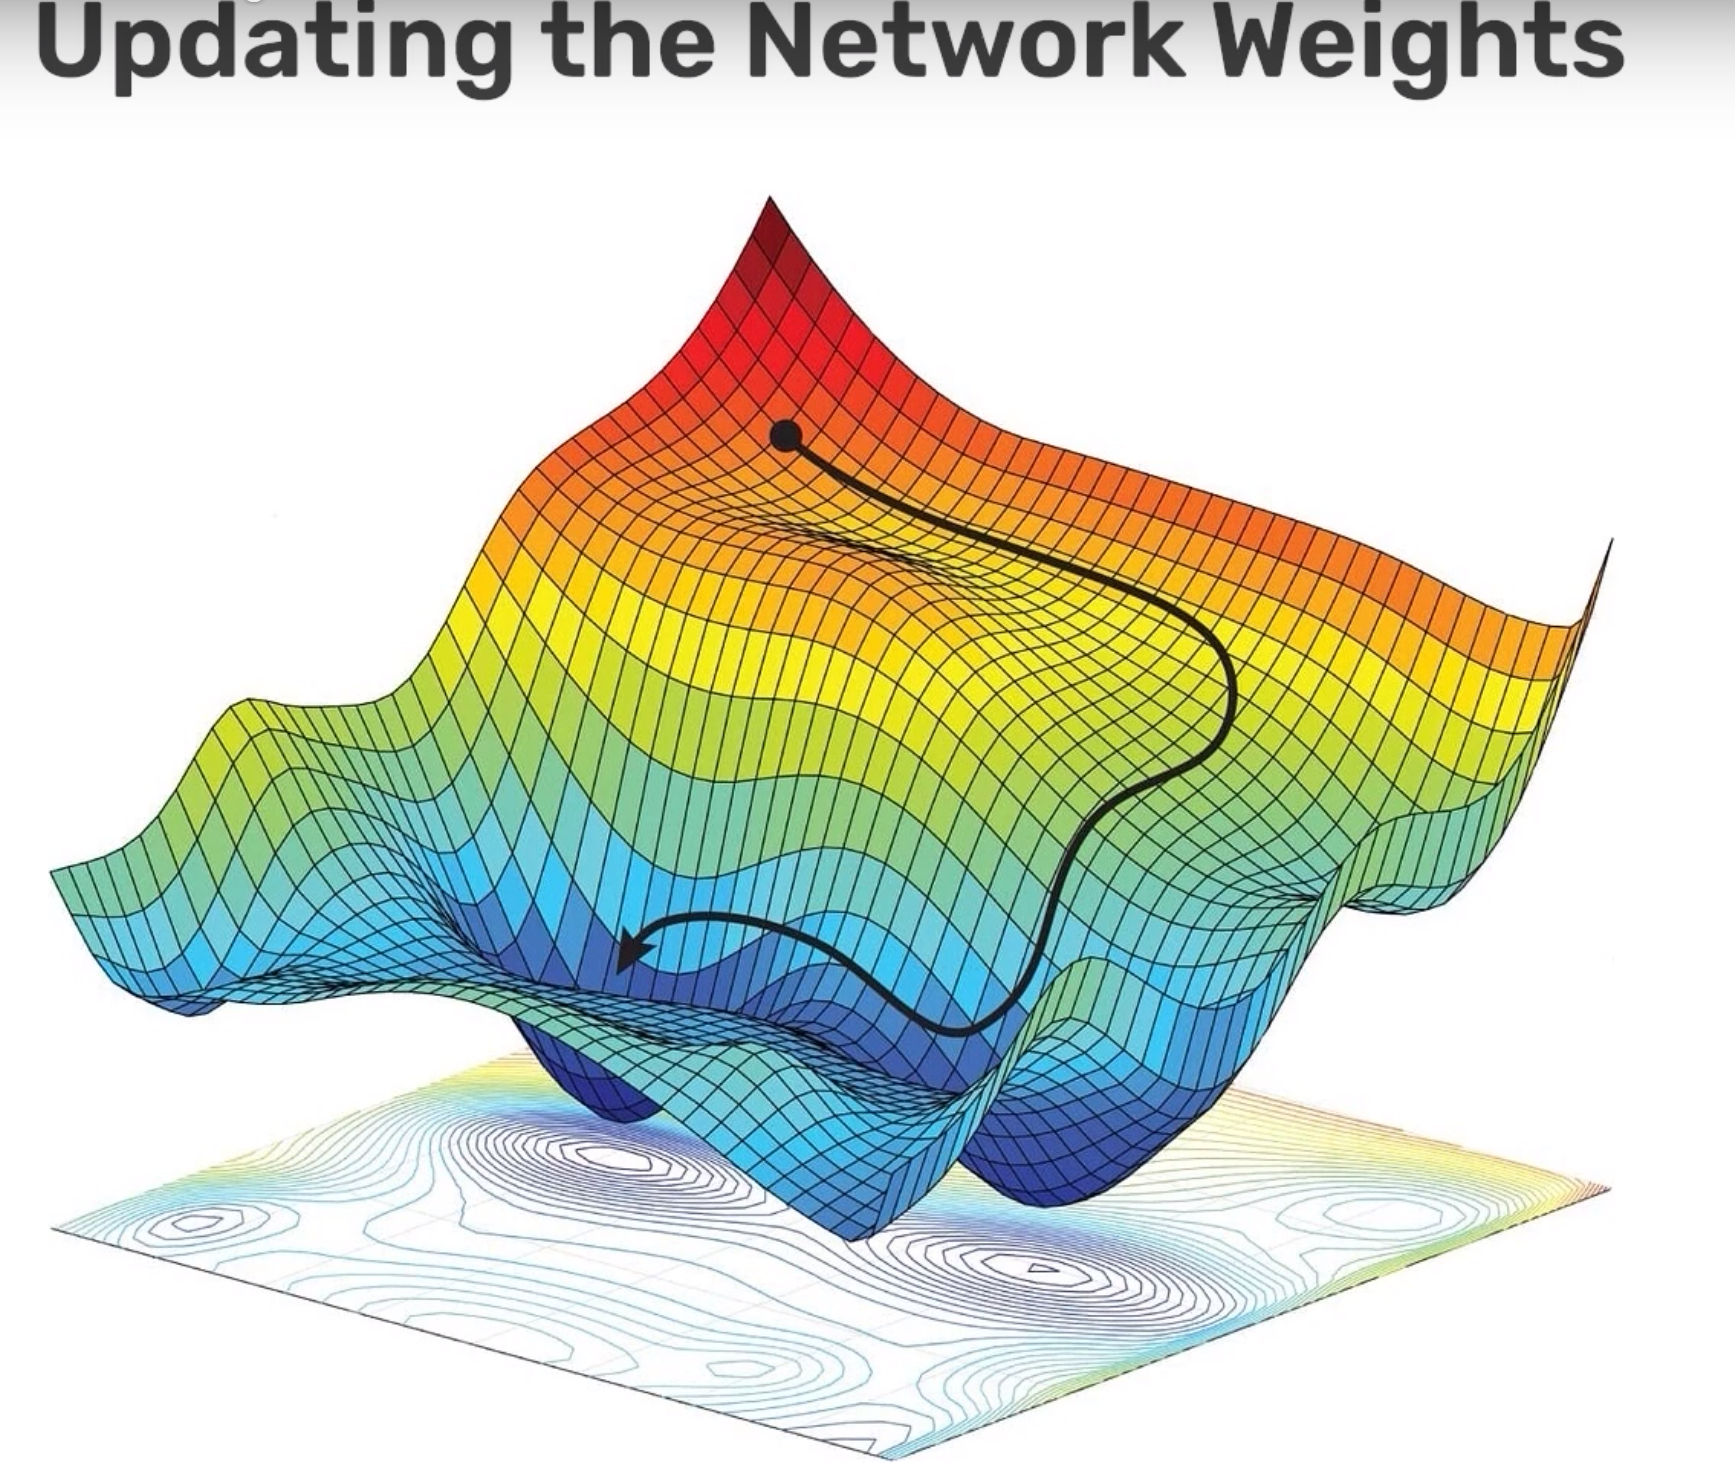

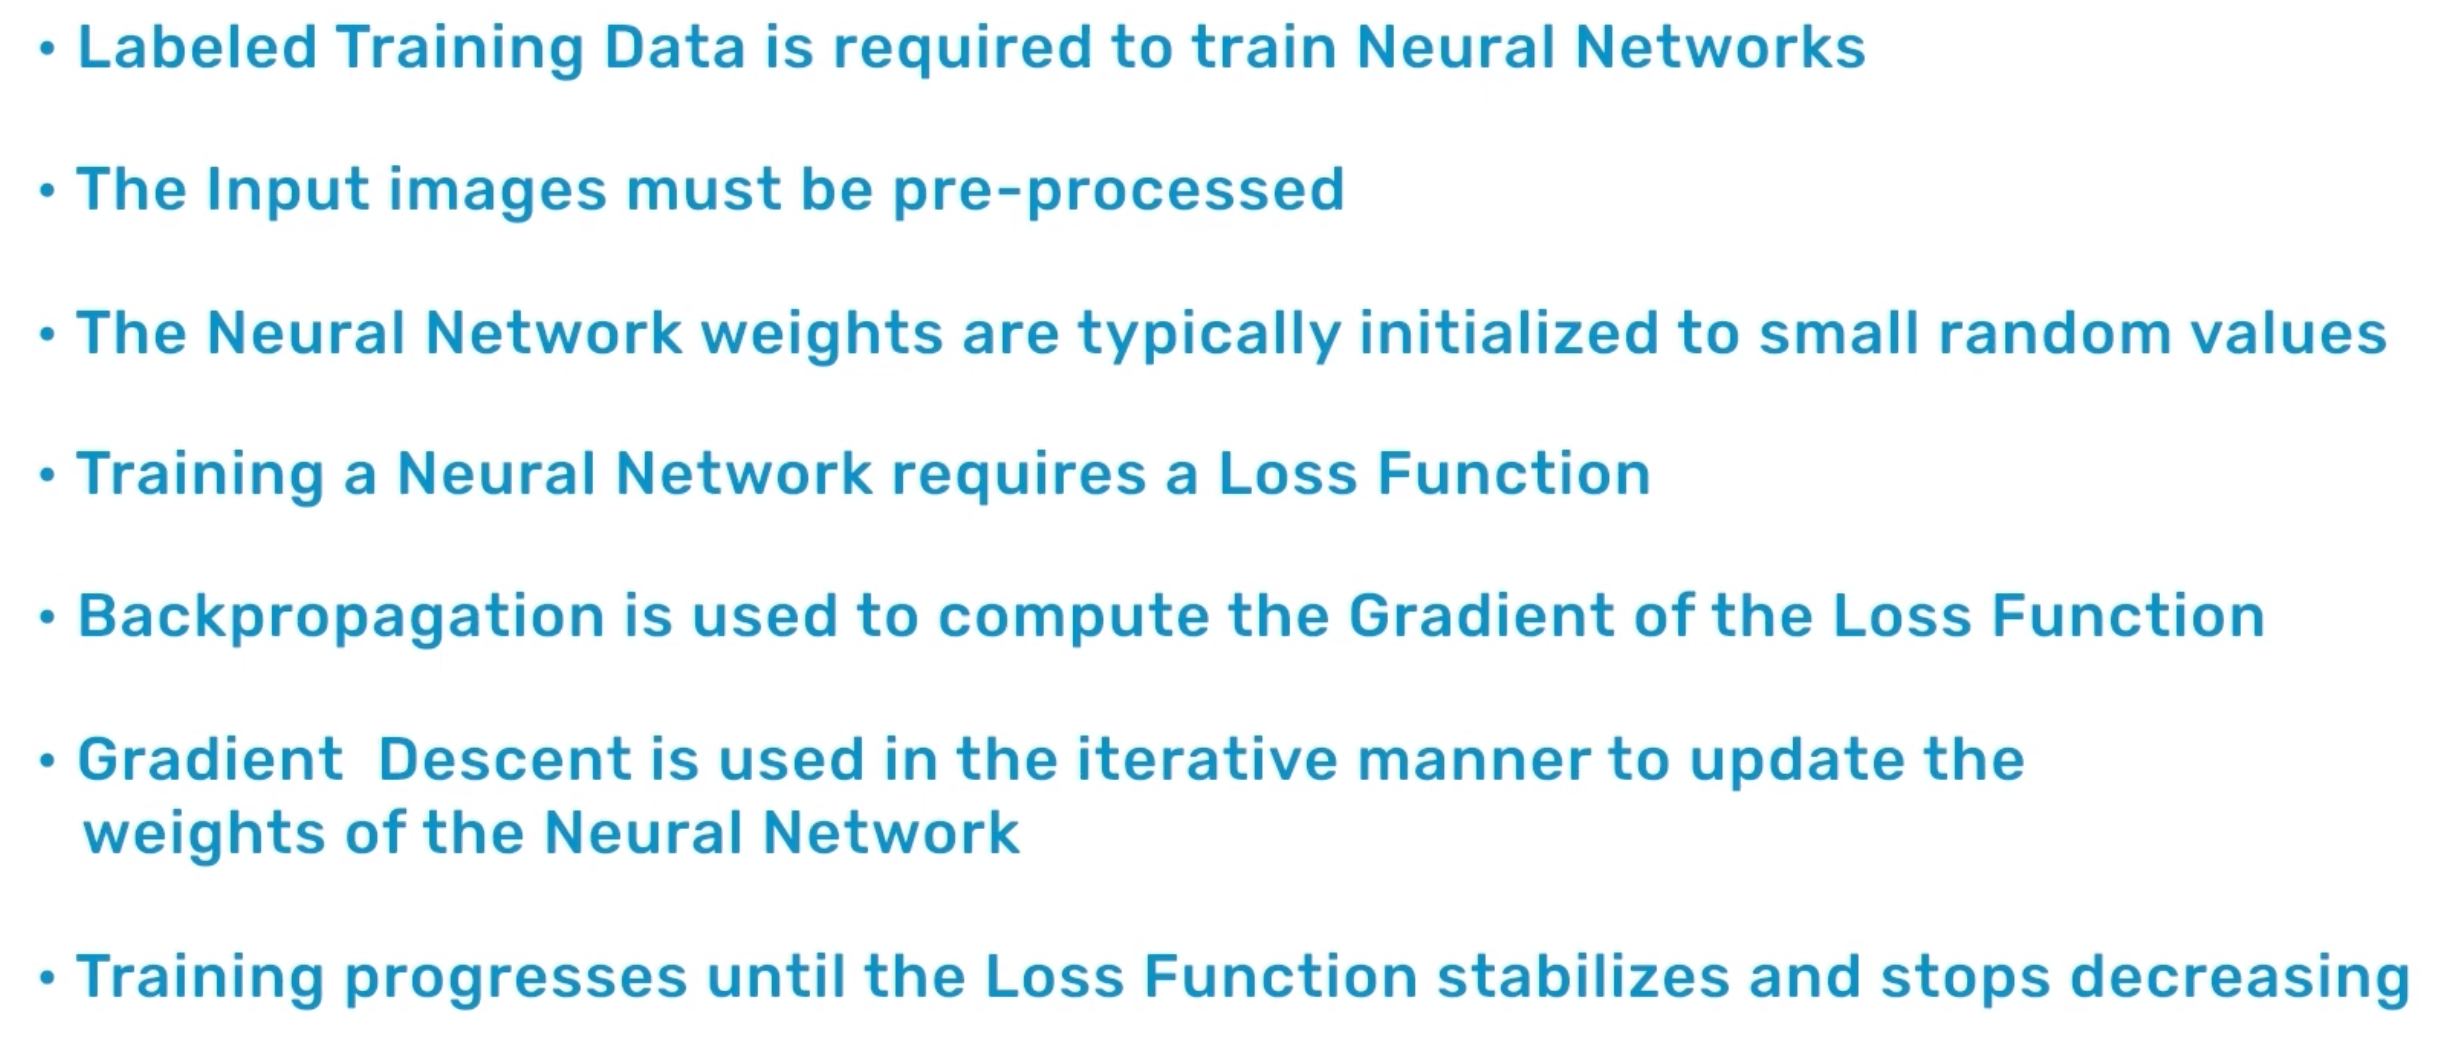

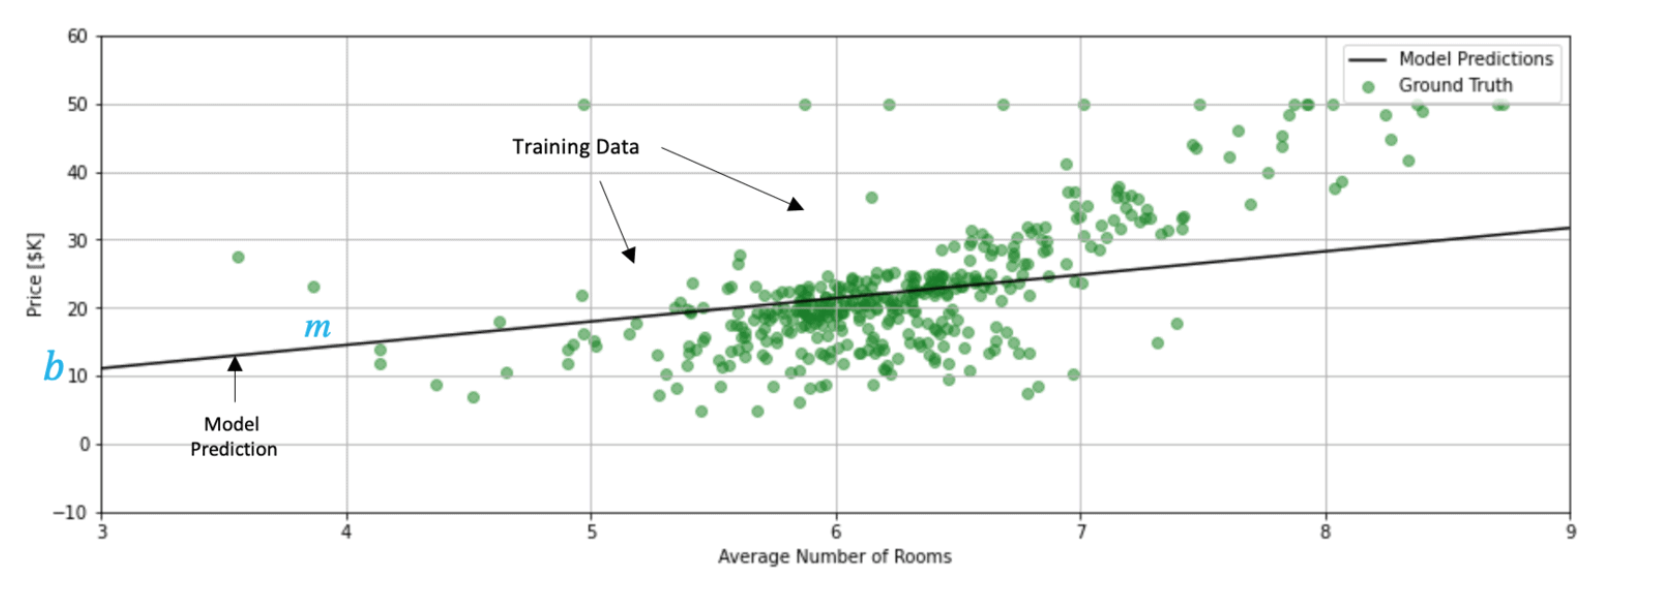

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers
import tensorflow as tf

In [2]:
# Make seed value
SEED_VALUE = 26

np.random.seed(SEED_VALUE)
tf.random.set_seed(seed=SEED_VALUE)

In [3]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

print(X_train.shape, end='\n\n')
print(X_train[0], end='\n\n')
print(y_train[0])

(404, 13)

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]

15.2


In [4]:
# Work with one fearture "Average number of rooms"
avg_rooms_train = X_train[:, 5]
avg_rooms_test = X_test[:, 5]

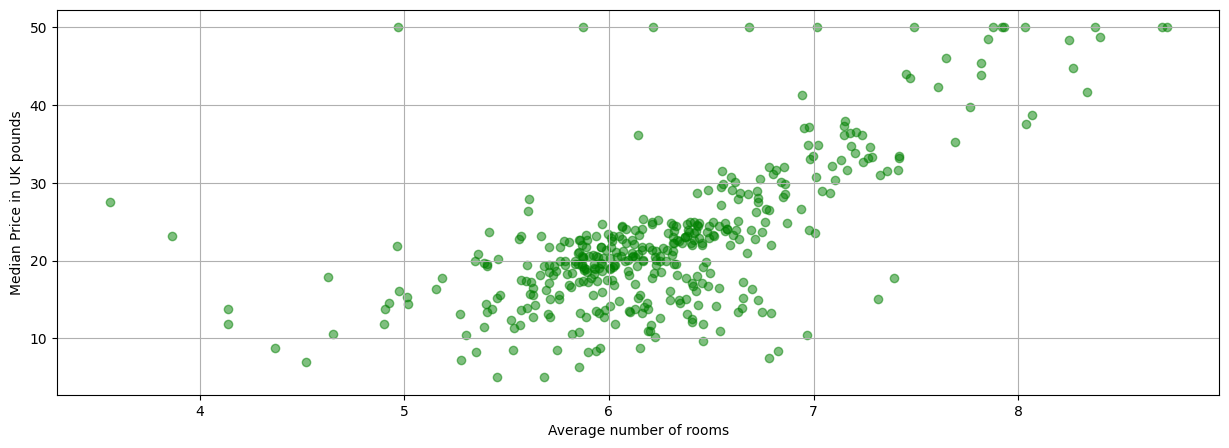

In [12]:
# Display scatter of dependencies
plt.figure(figsize=(15, 5))
plt.xlabel('Average number of rooms')
plt.ylabel('Median Price in UK pounds')
plt.grid(visible=True)
plt.scatter(x=avg_rooms_train, y=y_train, color='green', alpha=0.5);

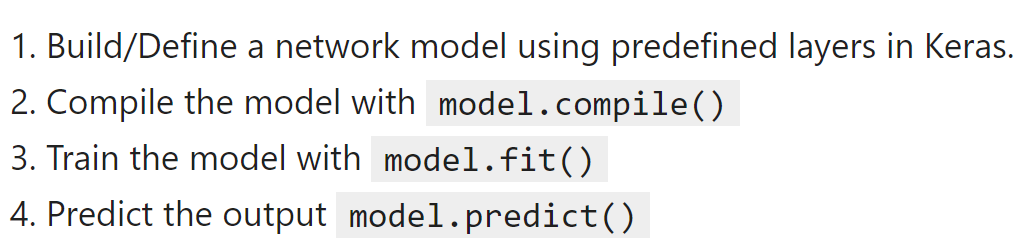

In [14]:
model = Sequential()
model.add(Dense(units=1, input_shape=(1,)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.005), loss='mse')

# [tf.keras.optimizers.experimental.RMSprop](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/experimental/RMSprop)

In [16]:
# Train the model
history = model.fit(
    x=avg_rooms_train,
    y=y_train,
    batch_size=16,
    epochs=100,
    validation_split=0.3
)

Epoch 1/100
18/18 [==============================] - 2s 15ms/step - loss: 358.6592 - val_loss: 418.1002
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 333.4716 - val_loss: 393.4952
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 312.4513 - val_loss: 371.6040
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 292.5887 - val_loss: 349.8049
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 273.1752 - val_loss: 328.8184
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 254.6057 - val_loss: 308.9391
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 237.2766 - val_loss: 289.8154
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 220.9003 - val_loss: 272.0755
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 204.9502 - val_loss: 254.0730
Epoch 10/100
18/18 [==============================] - 0s 4ms/step - loss

In [17]:
# Draw the loss graph
def plot_loss(history):
    plt.figure(figsize=(15, 5))
    plt.plot(history.history['loss'], 'g', label='Training Loss')
    plt.plot(history.history['val_loss'], 'r', label='Validation Loss')
    plt.xlim([0, 100])
    plt.ylim([0, 300])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(visible=True)

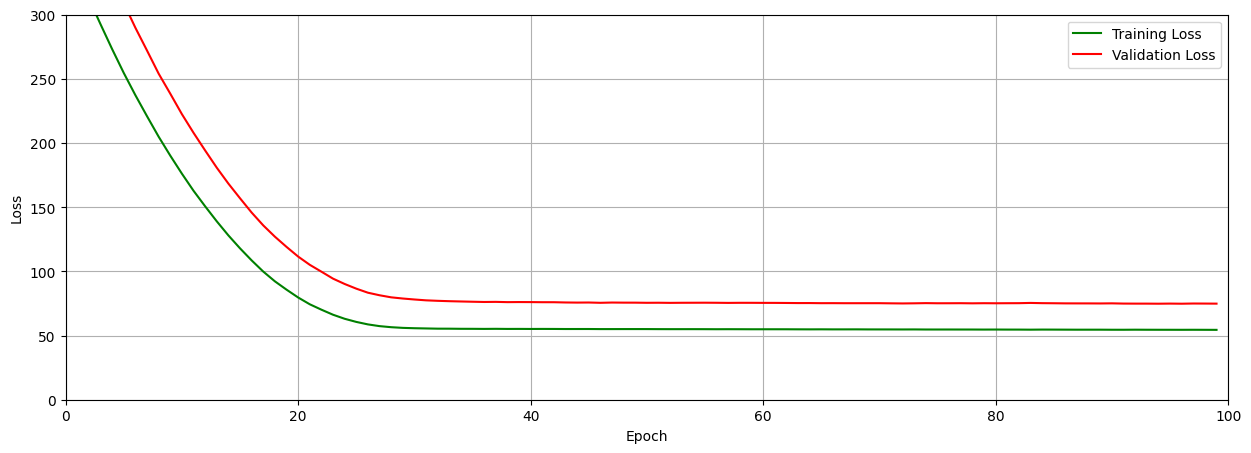

In [18]:
plot_loss(history)